Import python libraries required for the script

In [1]:
from rfpimp import *
from sklearn.ensemble import RandomForestClassifier #, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
rfc = RandomForestClassifier(n_estimators=300, warm_start=True)


Read the CSV files

In [3]:
df = pd.read_csv('VMI_Data_BP1_V02_AK6_mod02.csv')
print(df.columns)

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_OK', 'BP1_S8_L',
       'BP1_S7_L', 'BP1_S6_L', 'BP1_S5_L', 'BP1_S4_L', 'BP1_S3_L', 'BP1_S2_L',
       'BP1_S1_ML', 'BP1_S1_MR', 'BP1_S2_R', 'BP1_S3_R', 'BP1_S4_R',
       'BP1_S5_R', 'BP1_S6_R', 'BP1_S7_R', 'BP1_S8_R', 'PART_LENGTH',
       'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
       'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',
       'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',
       'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5',
       'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20

In [4]:
df = df.drop(['SPLICE_OK', 'SPLICE_GRADE', 'MID_SPLICE_GRADE', 'LFT_SPLICE_GRADE', # 'RHT_SPLICE_GRADE', 
              'LFT_SPLICE_LENGTH', 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 
              'LFT_SPLICE_DELTA', 'MID_SPLICE_DELTA', 'RHT_SPLICE_DELTA',              
              'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 
              'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50', 
              'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20', 'MID_SPLICE_MA50', 
              'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50',  
              'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20',  'RHT_SPLICE_MA50', 
              'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10',  'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50',
              'LFT_SPLICE_PREV', 'MID_SPLICE_PREV', 'RHT_SPLICE_PREV'
             ], axis=1)

print(df.columns)

for col in df.columns:
    if len(df[col].unique()) == 1:
        df = df.drop(col,inplace=True,axis=1)
        
# print(df.columns)
# df['SPLICE_GRADE'].head

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP1_S8_L', 'BP1_S7_L', 'BP1_S6_L',
       'BP1_S5_L', 'BP1_S4_L', 'BP1_S3_L', 'BP1_S2_L', 'BP1_S1_ML',
       'BP1_S1_MR', 'BP1_S2_R', 'BP1_S3_R', 'BP1_S4_R', 'BP1_S5_R', 'BP1_S6_R',
       'BP1_S7_R', 'BP1_S8_R', 'PART_LENGTH', 'RHT_SPLICE_GRADE'],
      dtype='object')


Check the columns in the data

In [5]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)


(118264, 20)
(118263, 20)


In [6]:
print(df.shape)
df = df.drop_duplicates(subset=['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP1_S8_L', 'BP1_S7_L', 'BP1_S6_L', 'BP1_S5_L', 
                                'BP1_S4_L', 'BP1_S3_L', 'BP1_S2_L', 'BP1_S1_ML', 'BP1_S1_MR', 'BP1_S2_R', 
                                'BP1_S3_R', 'BP1_S4_R', 'BP1_S5_R', 'BP1_S6_R', 'BP1_S7_R', 'BP1_S8_R'])
# df = df.drop_duplicates()
print(df.shape)
# df.head

(118263, 20)
(117555, 20)


In [7]:
# Variance of the columns - can drop columns based on the variance
df.std() > 0.02
# df.loc[:, df.std() > .02]

CUT_LENGTH           True
CONV_WAIT_TIME       True
BP1_S8_L            False
BP1_S7_L             True
BP1_S6_L             True
BP1_S5_L             True
BP1_S4_L             True
BP1_S3_L             True
BP1_S2_L             True
BP1_S1_ML            True
BP1_S1_MR            True
BP1_S2_R             True
BP1_S3_R             True
BP1_S4_R             True
BP1_S5_R             True
BP1_S6_R             True
BP1_S7_R             True
BP1_S8_R            False
PART_LENGTH          True
RHT_SPLICE_GRADE     True
dtype: bool

In [8]:
# PCA - todo this one and other few

# from sklearn.decomposition import PCA
# X = df.drop(['RHT_SPLICE_GRADE'], axis=1)
# pca = PCA()
# X_r = pca.fit(X).transform(X)

In [9]:
from imblearn.over_sampling import SMOTE

X = df.drop(['RHT_SPLICE_GRADE'], axis=1)
y = df['RHT_SPLICE_GRADE'].astype('int')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_train, x2, y_train, y2 = train_test_split(X, y, test_size=0.25, stratify=df['RHT_SPLICE_GRADE'])

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x2.shape)
print("Number transactions y_test dataset: ", y2.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x1, y1 = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x1.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y1.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y1==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y1==0)))

print("Test data, counts of label '1': {}".format(sum(y2==1)))
print("Test data, counts of label '0': {}".format(sum(y2==0)))

# x2, y2 = df_test.drop('RHT_SPLICE_GRADE',axis=1), df_test['RHT_SPLICE_GRADE'].astype('int')

Number transactions X_train dataset:  (88166, 19)
Number transactions y_train dataset:  (88166,)
Number transactions X_test dataset:  (29389, 19)
Number transactions y_test dataset:  (29389,)
Before OverSampling, counts of label '1': 81008
Before OverSampling, counts of label '0': 7158 

After OverSampling, the shape of train_X: (162016, 19)
After OverSampling, the shape of train_y: (162016,) 

After OverSampling, counts of label '1': 81008
After OverSampling, counts of label '0': 81008
Test data, counts of label '1': 27003
Test data, counts of label '0': 2386


In [10]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))
df = df.dropna()

                  Total  Percent
RHT_SPLICE_GRADE      0      0.0
PART_LENGTH           0      0.0
CONV_WAIT_TIME        0      0.0
BP1_S8_L              0      0.0
BP1_S7_L              0      0.0
BP1_S6_L              0      0.0
BP1_S5_L              0      0.0
BP1_S4_L              0      0.0
BP1_S3_L              0      0.0
BP1_S2_L              0      0.0


In [11]:
# def numericSG(row):
#     if row['SPLICE_GRADE'] == 'Bad':
#         return 0
#     if row['SPLICE_GRADE'] == 'OK' :
#         return 1
#     return 2

# def inverse(x):
#     if x==0: 
#         return 0
#     return 1/x

In [12]:
# df_train, df_test = train_test_split(df, test_size=0.25, stratify=df['RHT_SPLICE_GRADE'])

# x1, y1 = df_train.drop('RHT_SPLICE_GRADE',axis=1), df_train['RHT_SPLICE_GRADE'].astype('int')
# x2, y2 = df_test.drop('RHT_SPLICE_GRADE',axis=1), df_test['RHT_SPLICE_GRADE'].astype('int')

# print(x1.columns)

In [13]:
rfc.fit(x1,y1)
y2_RFC_model = rfc.predict(x2)
print("RandomForestClassifier Accuracy :", accuracy_score(y2, y2_RFC_model))
importances2 = rfc.feature_importances_
std2 = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices2 = np.argsort(importances2)[::-1]

RandomForestClassifier Accuracy : 0.9180645819864576


In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in it.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
target_names = ['Bad', 'Good']
class_names = target_names

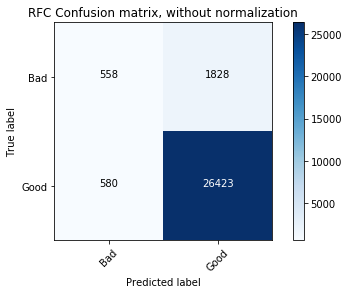

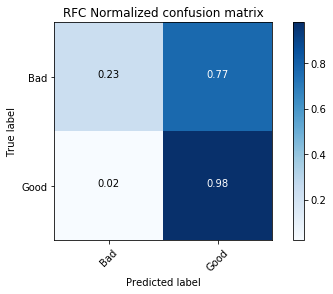

In [16]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(y2, y2_RFC_model)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='RFC Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='RFC Normalized confusion matrix')

plt.show();

In [17]:
print(" *********** RandomForestClassifier *********** ")
print(classification_report(y2, y2_RFC_model, target_names=target_names, sample_weight=None, digits=4))


 *********** RandomForestClassifier *********** 
              precision    recall  f1-score   support

         Bad     0.4903    0.2339    0.3167      2386
        Good     0.9353    0.9785    0.9564     27003

   micro avg     0.9181    0.9181    0.9181     29389
   macro avg     0.7128    0.6062    0.6366     29389
weighted avg     0.8992    0.9181    0.9045     29389



In [18]:
# import numpy as np
# from scipy import interp
# import matplotlib.pyplot as plt

# from sklearn import svm, datasets
# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import StratifiedKFold

# # Run classifier with cross-validation and plot ROC curves
# cv = StratifiedKFold(n_splits=6)
# classifier = svm.SVC(probability=True, random_state=7)

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

# X = df.drop(['SPLICE_GRADE'], axis=1)
# y = df['SPLICE_GRADE'].astype('int')

# i = 0
# for train, test in cv.split(X, y):
#     probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
#     # Compute ROC curve and area the curve
#     fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
#     tprs.append(interp(mean_fpr, fpr, tpr))
#     tprs[-1][0] = 0.0
#     roc_auc = auc(fpr, tpr)
#     aucs.append(roc_auc)
#     plt.plot(fpr, tpr, lw=1, alpha=0.3,
#              label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

#     i += 1
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#          label='Chance', alpha=.8)

In [19]:
# from sklearn.externals import joblib
# joblib.dump(rfc, 'rfc_bp1_02_great.pkl', compress=9)

In [20]:
# from sklearn2pmml import sklearn2pmml
# from sklearn2pmml import make_pmml_pipeline

# pipeline = make_pmml_pipeline(rfc)
# sklearn2pmml(pipeline, "rfc_bp1_rht.pmml", with_repr = True)

In [ ]:
# https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation